<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data_multi_delta_(_2_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n250.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,77.835995,-0.000341,87.835654,87.839048,-0.003395
1,0.0,1.0,36.311174,0.012024,46.323198,46.317624,0.005574
2,0.0,2.0,43.143516,0.007142,53.150658,53.149407,0.001251
3,0.0,3.0,80.276970,-0.005019,90.271951,90.279824,-0.007873
4,0.0,4.0,64.759047,0.003093,74.762140,74.763170,-0.001030
...,...,...,...,...,...,...,...
19995,999.0,15.0,25.231911,-0.021397,35.210514,35.227133,-0.016618
19996,999.0,16.0,79.819651,-0.006494,89.813157,89.821401,-0.008244
19997,999.0,17.0,99.041574,0.007373,109.048946,109.045622,0.003324
19998,999.0,18.0,21.647310,0.001713,31.649022,31.642103,0.006920


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,77.835995,-0.000341,87.835654,87.839048,-0.003395
1,0.0,1.0,36.311174,0.012024,46.323198,46.317624,0.005574
2,0.0,2.0,43.143516,0.007142,53.150658,53.149407,0.001251
3,0.0,3.0,80.276970,-0.005019,90.271951,90.279824,-0.007873
4,0.0,4.0,64.759047,0.003093,74.762140,74.763170,-0.001030
...,...,...,...,...,...,...,...
19995,999.0,15.0,25.231911,-0.021397,35.210514,35.227133,-0.016618
19996,999.0,16.0,79.819651,-0.006494,89.813157,89.821401,-0.008244
19997,999.0,17.0,99.041574,0.007373,109.048946,109.045622,0.003324
19998,999.0,18.0,21.647310,0.001713,31.649022,31.642103,0.006920


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    77.835995 -0.000341   87.835654   87.839048 -0.003395
      1.0    36.311174  0.012024   46.323198   46.317624  0.005574
      2.0    43.143516  0.007142   53.150658   53.149407  0.001251
      3.0    80.276970 -0.005019   90.271951   90.279824 -0.007873
      4.0    64.759047  0.003093   74.762140   74.763170 -0.001030
...                ...       ...         ...         ...       ...
999.0 15.0   25.231911 -0.021397   35.210514   35.227133 -0.016618
      16.0   79.819651 -0.006494   89.813157   89.821401 -0.008244
      17.0   99.041574  0.007373  109.048946  109.045622  0.003324
      18.0   21.647310  0.001713   31.649022   31.642103  0.006920
      19.0   46.537274  0.002385   56.539659   56.535043  0.004616

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    77.835995 -0.000341   87.835654   87.839048 -0.003395
      1.0    36.311174  0.012024   46.323198   46.317624  0.005574
      2.0    43.143516  0.007142   53.150658   53.149407  0.001251
      3.0    80.276970 -0.005019   90.271951   90.279824 -0.007873
      4.0    64.759047  0.003093   74.762140   74.763170 -0.001030
...                ...       ...         ...         ...       ...
999.0 15.0   25.231911 -0.021397   35.210514   35.227133 -0.016618
      16.0   79.819651 -0.006494   89.813157   89.821401 -0.008244
      17.0   99.041574  0.007373  109.048946  109.045622  0.003324
      18.0   21.647310  0.001713   31.649022   31.642103  0.006920
      19.0   46.537274  0.002385   56.539659   56.535043  0.004616

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,77.835995,-0.000341,87.835654,87.839048,-0.003395
1,0.0,1.0,36.311174,0.012024,46.323198,46.317624,0.005574
2,0.0,2.0,43.143516,0.007142,53.150658,53.149407,0.001251
3,0.0,3.0,80.276970,-0.005019,90.271951,90.279824,-0.007873
4,0.0,4.0,64.759047,0.003093,74.762140,74.763170,-0.001030
...,...,...,...,...,...,...,...
19995,999.0,15.0,25.231911,-0.021397,35.210514,35.227133,-0.016618
19996,999.0,16.0,79.819651,-0.006494,89.813157,89.821401,-0.008244
19997,999.0,17.0,99.041574,0.007373,109.048946,109.045622,0.003324
19998,999.0,18.0,21.647310,0.001713,31.649022,31.642103,0.006920


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    77.835995 -0.000341   87.835654   87.839048 -0.003395
      1.0    36.311174  0.012024   46.323198   46.317624  0.005574
      2.0    43.143516  0.007142   53.150658   53.149407  0.001251
      3.0    80.276970 -0.005019   90.271951   90.279824 -0.007873
      4.0    64.759047  0.003093   74.762140   74.763170 -0.001030
...                ...       ...         ...         ...       ...
999.0 15.0   25.231911 -0.021397   35.210514   35.227133 -0.016618
      16.0   79.819651 -0.006494   89.813157   89.821401 -0.008244
      17.0   99.041574  0.007373  109.048946  109.045622  0.003324
      18.0   21.647310  0.001713   31.649022   31.642103  0.006920
      19.0   46.537274  0.002385   56.539659   56.535043  0.004616

[20000 rows x 5 columns]

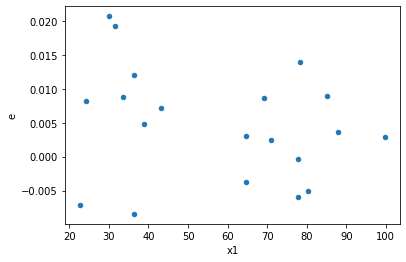

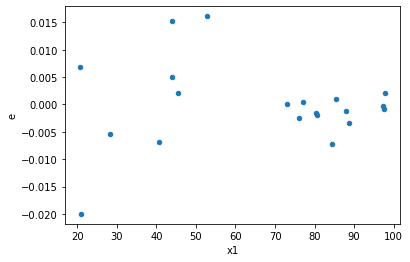

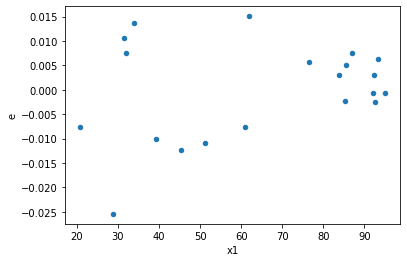

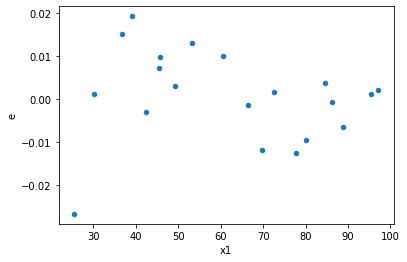

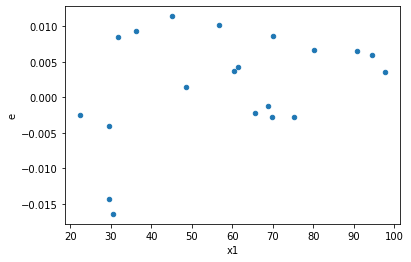

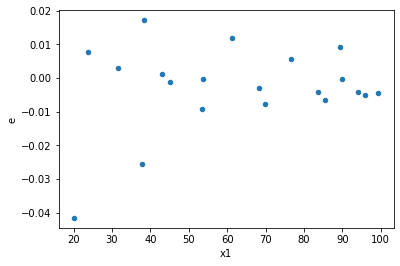

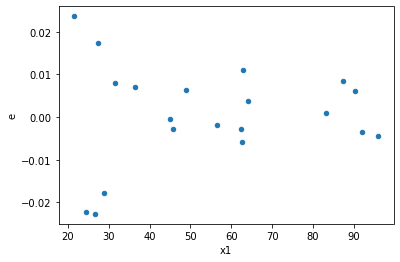

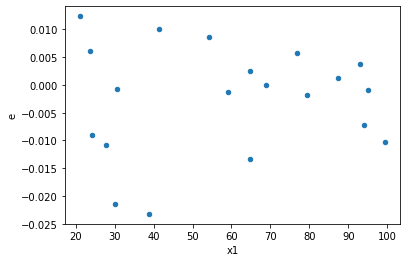

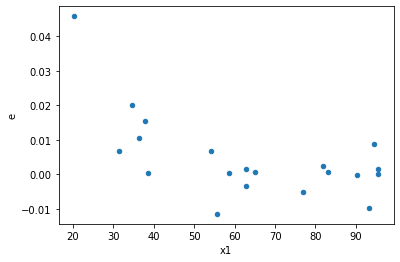

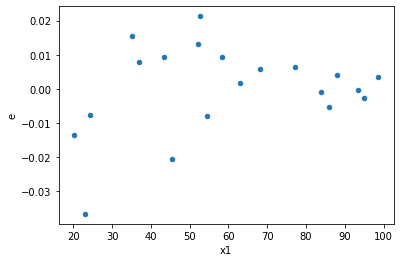

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x1')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
28.0,7.0,7.0,0.0001561560282150083,0.00017809624590741087,2.2308004030715473e-05,2.544232084391584e-05,1.1405018937994087,0.8667590973709984,0.5666204513145008,0.4333795486854992,Reject001=1 : Homoscedasticity
55.0,7.0,7.0,0.00026780723623829694,0.0003708149117194215,3.825817660547099e-05,5.2973558817060214e-05,1.3846336526525653,0.678449847435211,0.6607750762823945,0.3392249237176055,Reject001=1 : Homoscedasticity
73.0,7.0,7.0,9.488453356401263e-05,0.0001580115867204543,1.3554933366287519e-05,2.2573083817207754e-05,1.6653039308440483,0.517154512196853,0.7414227439015735,0.2585772560984265,Reject001=1 : Homoscedasticity
82.0,7.0,7.0,0.00014473031081383287,0.00019934624125053887,2.067575868769041e-05,2.8478034464362697e-05,1.3773634571058073,0.6833468062661732,0.6583265968669134,0.3416734031330866,Reject001=1 : Homoscedasticity
115.0,7.0,7.0,0.00011945877426620361,0.0002228948911487451,1.7065539180886228e-05,3.1842127306963587e-05,1.8658729132114065,0.4294198064336274,0.7852900967831863,0.2147099032168137,Reject001=1 : Homoscedasticity
231.0,7.0,7.0,0.0002763033361983586,0.0002772573624602439,3.9471905171194084e-05,3.96081946371777e-05,1.003452822086811,0.996489054343142,0.501755472828429,0.498244527171571,Reject001=1 : Homoscedasticity
455.0,7.0,7.0,0.000128248503861045,0.0002782999897215385,1.8321214837292145e-05,3.975714138879121e-05,2.1700057415334184,0.32831287867710235,0.8358435606614488,0.16415643933855117,Reject001=1 : Homoscedasticity
462.0,7.0,7.0,8.122186902045868e-05,0.00027790648185656324,1.1603124145779811e-05,3.9700925979509035e-05,3.4215721111584174,0.12691243089873128,0.9365437845506344,0.06345621544936564,Reject001=1 : Homoscedasticity
471.0,7.0,7.0,0.00013176667422863685,0.00037151932250664146,1.882381060409098e-05,5.307418892952021e-05,2.8195241678635243,0.19483908731005872,0.9025804563449706,0.09741954365502936,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,0.0008076320285878009,0.00030422220272288144,0.00011537600408397157,4.346031467469735e-05,0.3766841729331048,0.2210281322133411,Reject001=1 : Homoscedasticity
1.0,7.0,7.0,0.0006217699875702838,4.284688935078084e-05,8.882428393861196e-05,6.120984192968691e-06,0.06891115719209188,0.0022290733532298016,Reject001=0 : Heteroscedasticity
2.0,7.0,7.0,0.001253614876899925,0.00010756233053682308,0.00017908783955713215,1.5366047219546153e-05,0.08580173426372768,0.004411271398286137,Reject001=0 : Heteroscedasticity
3.0,7.0,7.0,0.0009713326216341046,0.00022551478915105143,0.00013876180309058638,3.2216398450150205e-05,0.23217050897730637,0.07299864126661385,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,0.0005928604426091869,0.00012211131003211348,8.469434894416955e-05,1.7444472861730496e-05,0.20596973799550522,0.05382996138263962,Reject001=1 : Homoscedasticity
5.0,7.0,7.0,0.002347509996354559,0.0001840740396007172,0.00033535857090779414,2.629629137153103e-05,0.07841246251839831,0.0033395563174602317,Reject001=0 : Heteroscedasticity
6.0,7.0,7.0,0.0023023332912624705,0.000268147258622758,0.00032890475589463864,3.8306751231822574e-05,0.11646761120138305,0.011062602299108512,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,0.001245856533583238,0.0001457857908040041,0.00017797950479760542,2.0826541543429156e-05,0.11701651584609511,0.011216455151840768,Reject001=1 : Homoscedasticity
8.0,7.0,7.0,0.0006852748955043128,0.00020128465518889452,9.789641364347326e-05,2.8754950741270646e-05,0.29372833662725023,0.12838145158304215,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      530
Reject001=0 : Heteroscedasticity    470
Name: Result_test, dtype: int64